# Traffic Sign Classification

## Problem Statement

Traffic Sign Classification. This project is useful for all autonomous vehicles. And able to identify traffic signs from the image.

## Dataset Description:

The dataset contains more than 50,000 images of different traffic signs. The size of the dataset is around 600 MB. The dataset has a train folder which contains images inside each class and a test folder which we will use for testing our model.

### Dataset link: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

## Methodology to solve the problem

1. Explore the dataset
2. Splitting the data into Train and Test Set
3. Build a CNN model
4. Train and validate the model
5. Test the model with test dataset
6. Predection

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import warnings
warnings.filterwarnings("ignore")

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Import Data

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
for i in tqdm(range(classes)):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

  0%|          | 0/43 [00:00<?, ?it/s]

In [4]:
print("Shape of data is:", data.shape)
print("Shape of labels is:", labels.shape)

Shape of data is: (39209, 30, 30, 3)
Shape of labels is: (39209,)


### Splitting the data into Train and Test Set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [6]:
print("Shape of train images is:", X_train.shape)
print("Shape of test images is:", X_test.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_test.shape)

Shape of train images is: (31367, 30, 30, 3)
Shape of test images is: (7842, 30, 30, 3)
Shape of labels is: (31367, 43)
Shape of labels is: (7842, 43)


## Building Model CNN

In [7]:
epochs = 10
batch_size = 32

In [8]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(43, activation='softmax'))

### Summary of the CNN Model

In [9]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [10]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the CNN

In [11]:
cnn_history = cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpb6em6_m8.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpb6em6_m8.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
981/981 [==============================] - 71s 54ms/step - loss: 2.8107 - accuracy: 0.3929 - val_loss: 0.2284 - val_accuracy: 0.9380
Epoch 2/10
981/981 [==============================] - 54s 55ms/step - loss: 0.4719 - accuracy: 0.8764 - val_loss: 0.0966 - val_accuracy: 0.9770
Epoch 3/10
981/981 [==============================] - 52s 53ms/step - loss: 0.2966 - accuracy: 0.9213 - val_

In [12]:
cnn_history.history

{'loss': [1.5172663927078247,
  0.4031127095222473,
  0.28953370451927185,
  0.2362450808286667,
  0.23423069715499878,
  0.22041629254817963,
  0.23476025462150574,
  0.2176714837551117,
  0.1991080790758133,
  0.20416465401649475],
 'accuracy': [0.6194407939910889,
  0.8950489163398743,
  0.9246660470962524,
  0.9400962591171265,
  0.9415627717971802,
  0.9444639086723328,
  0.9432205557823181,
  0.9465361833572388,
  0.9516689777374268,
  0.9527209997177124],
 'val_loss': [0.22844165563583374,
  0.09659615904092789,
  0.10337609052658081,
  0.06471280008554459,
  0.07677768170833588,
  0.07021987438201904,
  0.08931980282068253,
  0.055218107998371124,
  0.05555613711476326,
  0.037519421428442],
 'val_accuracy': [0.9380260109901428,
  0.9770466685295105,
  0.9739862084388733,
  0.9853353500366211,
  0.9794695377349854,
  0.9827849864959717,
  0.9767916202545166,
  0.9883958101272583,
  0.9873756766319275,
  0.9904361367225647]}

### Display the Accuracy and Loss Plot

In [22]:
print("CNN training loss: ", round(min(cnn_history.history['loss']),3))
print("CNN Val loss: ", round(min(cnn_history.history['val_loss']),3))
print("CNN accuracy:", round(max(cnn_history.history['accuracy']),4)*100,"%")
print("CNN Val accuracy:", round(max(cnn_history.history['val_accuracy']),5)*100,"%")

CNN training loss:  0.199
CNN Val loss:  0.038
CNN accuracy: 95.27 %
CNN Val accuracy: 99.044 %


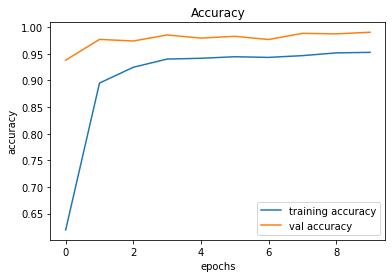

In [14]:
plt.plot(cnn_history.history['accuracy'], label='training accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

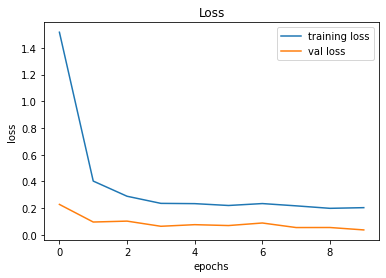

In [15]:
plt.plot(cnn_history.history['loss'], label='training loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Test model with test dataset

In [16]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

In [17]:
for img in tqdm(imgs):
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

  0%|          | 0/12630 [00:00<?, ?it/s]

In [18]:
print("Shape of train images is:", X_train.shape)
print("Shape of test images is:", X_test.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_test.shape)

Shape of train images is: (31367, 30, 30, 3)
Shape of test images is: (12630, 30, 30, 3)
Shape of labels is: (31367, 43)
Shape of labels is: (12630, 8)


## Make Prediction

In [19]:
cnn_pred = cnn_model.predict_classes(X_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(labels, cnn_pred)
print("Accuracy: ", round(accuracy_score,5)*100, "%")

Accuracy:  96.785 %


## Save CNN Model

In [21]:
cnn_model.save("traffic_sign_classification.h5")